In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Preprocessing

In [2]:
red_wine_data = pd.read_csv("./wine+quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("./wine+quality/winequality-white.csv", sep=";")
data = pd.concat([red_wine_data, white_wine_data])

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


# Data transformation
The project requires us to work with binary classification data, wehreas this data set has multiclass classification for the target attribute quality. To align with the project requirements a "recommended" attribute is derived from the "quality" attribute. If the quality of data item is higher than 6, the wine is recommended i.e, it the recommended attribute has value 1.

In [4]:
data["recommendation"] = (data["quality"] > 6).astype('int32')
data = data.drop("quality", axis=1)

In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommendation
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


In [6]:
print("Dataframe shape", data.shape)
print()
print("Check type of data")
print(data.dtypes)
print()
print("Check for na")
print(data.isna().sum())

Dataframe shape (6497, 12)

Check type of data
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
recommendation            int32
dtype: object

Check for na
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
recommendation          0
dtype: int64


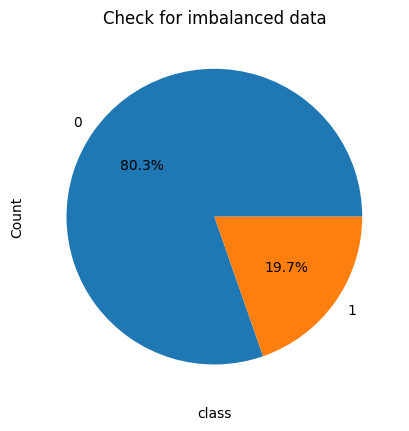

In [7]:
class_dist = data["recommendation"].value_counts().sort_index()
plt.pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%')

plt.title("Check for imbalanced data")
plt.xlabel('class')
plt.ylabel('Count')

plt.show()

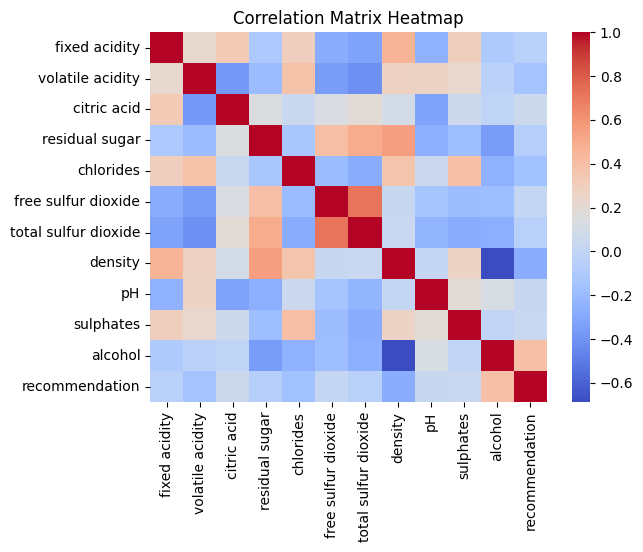

In [8]:
corr_matrix = data.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(columns=['recommendation'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Feature         VIF
0          fixed acidity   58.897405
1       volatile acidity    8.943681
2            citric acid    9.340251
3         residual sugar    3.576148
4              chlorides    5.575434
5    free sulfur dioxide    8.452180
6   total sulfur dioxide   14.732237
7                density  936.984064
8                     pH  589.005172
9              sulphates   18.491253
10               alcohol  107.135452


# Model Selection


1.   **Decision Trees**:  Even though there is multicollinearity (as shown by VIF values), Decision Trees are not affected by this because they split the data based on single features at each node.
2. **Bayesian Networks**: BayNets are generally not highly sensitive to multicollinearity, as they focus on conditional independence between variables rather than direct linear relationships.
3.   **Conv1D**: The Conv1D layer applies filters across the input features in a sliding window manner.



# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
def predict_with_random_forest(X_train, y_train, X_test):
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)
  y_prob = rf.predict_proba(X_test)
  return y_pred, y_prob[:,1]

# Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
def predict_with_decision_tree(X_train, y_train, X_test):
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  y_prob = dt.predict_proba(X_test)
  return y_pred, y_prob[:,1]

# Conv1D

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = None
def predict_with_conv1d(X_train, y_train, X_test):
  global model
  if model is None:
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
  y_pred = model.predict(X_test)
  return y_pred


# Util Functions

In [15]:
from typing import TypedDict

class Measures(TypedDict):
    tpr: float
    tnr: float
    precision: float
    npv: float
    fpr: float
    fdr: float
    fnr: float
    acc: float
    f1: float
    err_rate: float
    bacc: float
    tss: float
    hss: float
    bss: float
    auc: float

In [16]:
from sklearn.metrics import confusion_matrix

def get_classification_outcomes(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn, fp, fn, tp

In [17]:
def visualize_model_performance(tn, fp, fn, tp ):
  print()
  print('Visualizing Model Performance')
  print(f"{'':<5} {'':<5} {'Actual':<5}")
  print(f"{'':<5} {'':<5} {'Positive':<5} {'Negative':<5}")
  print(f"{'Predicted':<5} {'Positive':<5} {tp:<5} {fp:<5}")
  print(f"{'':<5} {'Negative':<5} {fn:<5} {tn:<5}")
  print()

In [18]:
def safe_divide(numerator, denominator):
    if denominator == 0:
      return 0
    else:
      return numerator / denominator

In [50]:
def calculate_measures(y_true, y_pred, y_prob) -> Measures:
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, brier_score_loss
  import numpy as np
  test_measures = {}
    
  measures = {}
  tn, fp, fn, tp = get_classification_outcomes(y_true, y_pred)
  # visualize_model_performance(tn, fp, fn, tp )
  p = tp + fn
  n = tn + fp
  measures['tpr'] = safe_divide(tp, p)
  measures['tnr'] = safe_divide(tn, n)
  measures['precision'] = safe_divide(tp, (fp + tp))
  measures['npv'] = safe_divide(tn, (tn + fn))
  measures['fpr'] = safe_divide(fp, n)
  measures['fdr'] = safe_divide(fp, (fp + tp))
  measures['fnr'] = safe_divide(fn, p)
  measures['acc'] = safe_divide((tp + tn), (p + n))
  measures['f1'] = safe_divide((2 * measures['precision'] * measures['tpr']), (measures['precision'] + measures['tpr']))
  measures['err_rate'] = safe_divide((fp + fn), (p + n))
  measures['bacc'] = (measures['tpr'] + measures['tnr']) / 2
  measures['tss'] = (safe_divide(tp, (fn + tp))) - (safe_divide(fp, (fp + tn)))
  measures['hss'] = safe_divide(2 * ((tp * tn) - (fp * fn)), ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)))

  # measures['bss'] = 
  # measures['auc'] = find_auc(y_true, y_pred)

  return Measures(measures)

In [78]:
def find_auc(y_true, y_pred):
  ser = pd.Series(y_pred)
  sorted_ser = ser.sort_values()
  print(sorted_ser)

  # TP = FP = 0
  # FN = sum(y_true)
  # TN = len(y_true) - FN
  # points = [(0, 0)]

  # for score, label in data:
  #     if label == 1:
  #         TP += 1
  #         FN -= 1
  #     else:
  #         FP += 1
  #         TN -= 1

  #     TPR = safe_divide(TP, (TP + FN))
  #     FPR = safe_divide(FP, (FP + TN))

  #     points.append((FPR, TPR))

  # auc = 0.0
  # for i in range(1, len(points)):
  #     x1, y1 = points[i-1]
  #     x2, y2 = points[i]
  #     auc += (x2 - x1) * (y1 + y2) / 2
  # return auc

In [79]:
find_auc(y_test, rf_pred)

0      0
346    0
345    0
344    0
343    0
      ..
554    1
555    1
556    1
576    1
648    1
Length: 649, dtype: int32


# Train and test dataset preparation

In [40]:
#### Visualize measure in each fold
from typing import Dict, List

def viz_measures_k_fold(k, **kwargs: Measures):
  suffix = 'th'
  if k%10 == 1: suffix = 'st'
  elif k%10 == 2: suffix = 'nd'
  elif k%10 == 3: suffix = 'rd'
  print()
  print('Visualizing Model Performance', f'in {k}{suffix} fold:' if k > 0 else '')
  print(f"{'Measure':<13}", end='')
  for model in kwargs.keys():
    print(f'{model:<13}', end='')
  print()
  tup = next(iter(kwargs.items()))
  for measure in tup[1].keys():
    print(f'{measure:<13}', end='')
    for _, measures in kwargs.items():
      print(f'{measures[measure]:<13.2f}', end='')
    print()
  print()

def viz_measures_model(model, measures: List[Measures]):
  print()
  print('Visualizing ', model, 'Performance in Each Fold')
  print(f"{'Measure':<13}", end='')
  for fold in range(1, 11):
    print(f'{fold:<13}', end='')
  print()
  for measure in measures[0].keys():
    print(f'{measure:<13}', end='')
    for k_measures in measures:
      print(f'{k_measures[measure]:<13.2f}', end='')
    print()
  print()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

rf_measures = []
dt_measures = []
conv1D_measures = []
test_rf_measures = []
test_dt_measures = []
test_conv1D_measures = []

### Ensures each fold has the same proportion of classes as the complete dataset.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y = data["recommendation"]
X = data.drop("recommendation", axis=1)

for idx, (train_index, test_index) in enumerate(kf.split(X, y), start = 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    rf_pred, rf_prob = predict_with_random_forest(X_resampled, y_resampled, X_test)
    measures = calculate_measures(y_test, rf_pred, rf_prob)
    rf_measures.append(measures)


    dt_pred, dt_prob = predict_with_decision_tree(X_resampled, y_resampled, X_test)
    measures = calculate_measures(y_test, dt_pred, dt_prob)
    dt_measures.append(measures)

    conv1d_prob = predict_with_conv1d(X_resampled, y_resampled, X_test)
    conv1d_pred = (conv1d_prob > 0.5).astype(int)
    measures = calculate_measures(y_test, [item for row in conv1d_pred for item in row], conv1d_prob.flatten())
    conv1D_measures.append(measures)

    viz_measures_k_fold(idx, RandomForest = rf_measures[idx - 1], DecisionTree=dt_measures[idx - 1], Conv1D=conv1D_measures[idx - 1])

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step

Visualizing Model Performance in 1st fold:
Measure      RandomForest DecisionTree Conv1D       
tpr          0.72         0.68         0.80         
tnr          0.89         0.86         0.78         
precision    0.61         0.55         0.47         
npv          0.93         0.92         0.94         
fpr          0.11         0.14         0.22         
fdr          0.39         0.45         0.53         
fnr          0.28         0.32         0.20         
acc          0.85         0.83         0.78         
f1           0.66         0.61         0.59         
err_rate     0.15         0.17         0.22         
bacc         0.80         0.77         0.79         
tss          0.60         0.54         0.57         
hss          0.56         0.50         0.45         

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step

Visualizing Model Performance in 2nd fold:
Measure      RandomForest DecisionTree Conv1D       
tpr          0.73         0.71    

In [52]:
viz_measures_model("Random Forest", rf_measures)


Visualizing  Random Forest Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tpr          0.72         0.73         0.80         0.80         0.74         0.74         0.79         0.71         0.83         0.80         
tnr          0.89         0.90         0.91         0.88         0.91         0.90         0.90         0.91         0.90         0.92         
precision    0.61         0.65         0.68         0.62         0.66         0.64         0.65         0.66         0.67         0.71         
npv          0.93         0.93         0.95         0.95         0.93         0.93         0.95         0.93         0.96         0.95         
fpr          0.11         0.10         0.09         0.12         0.09         0.10         0.10         0.09         0.10         0.08         
fdr          0.39         0.35         0.32         0.38         0.34         0.36 

In [53]:
viz_measures_model("Decision Tree", dt_measures)


Visualizing  Decision Tree Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tpr          0.68         0.71         0.73         0.64         0.66         0.69         0.76         0.68         0.70         0.72         
tnr          0.86         0.87         0.87         0.84         0.86         0.88         0.85         0.88         0.85         0.86         
precision    0.55         0.57         0.58         0.49         0.53         0.59         0.55         0.59         0.53         0.56         
npv          0.92         0.92         0.93         0.90         0.91         0.92         0.93         0.92         0.92         0.93         
fpr          0.14         0.13         0.13         0.16         0.14         0.12         0.15         0.12         0.15         0.14         
fdr          0.45         0.43         0.42         0.51         0.47         0.41 

In [54]:
viz_measures_model("Conv 1D", conv1D_measures)


Visualizing  Conv 1D Performance in Each Fold
Measure      1            2            3            4            5            6            7            8            9            10           
tpr          0.80         0.85         0.95         0.89         0.82         0.83         0.80         0.91         0.86         0.91         
tnr          0.78         0.73         0.68         0.69         0.78         0.73         0.77         0.69         0.75         0.69         
precision    0.47         0.44         0.42         0.41         0.47         0.43         0.46         0.42         0.46         0.42         
npv          0.94         0.95         0.98         0.96         0.95         0.95         0.94         0.97         0.96         0.97         
fpr          0.22         0.27         0.32         0.31         0.22         0.27         0.23         0.31         0.25         0.31         
fdr          0.53         0.56         0.58         0.59         0.53         0.57       

In [56]:
## Average measures
def calc_avg_measures(measures):
  fpr_values, tpr_values = [], []
  avg = {}
  metrics = measures[0].keys();
  for metric in metrics:
    for i in range(0, 10):
      avg[metric] = avg.get(metric, 0) + measures[i][metric]
      if metric == 'fpr':
        fpr_values.append(measures[i][metric])
      elif metric == 'tpr':
        tpr_values.append(measures[i][metric])
    avg[metric] = avg[metric] / 10
  return avg

viz_measures_k_fold(0, RandomForest = calc_avg_measures(rf_measures), DecisionTree=calc_avg_measures(dt_measures), Conv1D=calc_avg_measures(conv1D_measures))


Visualizing Model Performance 
Measure      RandomForest DecisionTree Conv1D       
tpr          0.77         0.70         0.86         
tnr          0.90         0.86         0.73         
precision    0.65         0.55         0.44         
npv          0.94         0.92         0.96         
fpr          0.10         0.14         0.27         
fdr          0.35         0.45         0.56         
fnr          0.23         0.30         0.14         
acc          0.87         0.83         0.75         
f1           0.71         0.62         0.58         
err_rate     0.13         0.17         0.25         
bacc         0.83         0.78         0.79         
tss          0.67         0.56         0.59         
hss          0.63         0.51         0.43         



In [57]:
def visualize_roc(y_test, y_pred, predictor):
  from sklearn.metrics import roc_curve, auc
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color="darkorange", label=f'Area: {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f'ROC Curve for {predictor} Predictions')
  plt.legend(loc="lower right")
  plt.show()

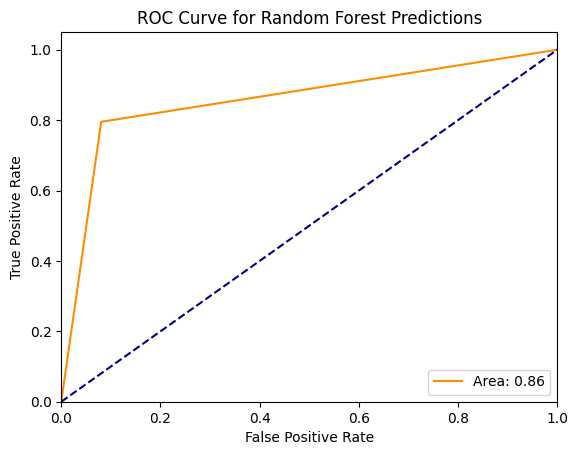

In [58]:
visualize_roc(y_test, rf_pred, "Random Forest")

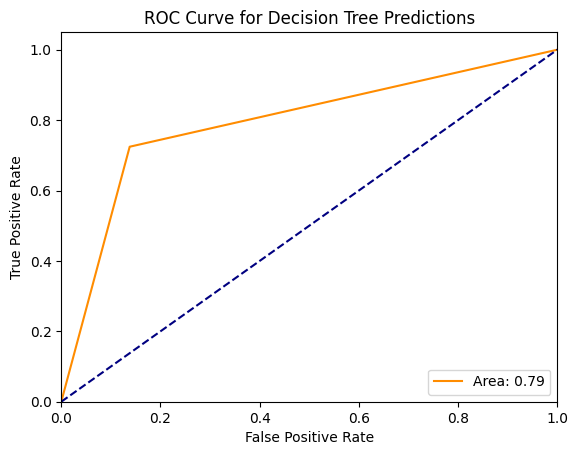

In [59]:
visualize_roc(y_test, dt_pred, "Decision Tree")

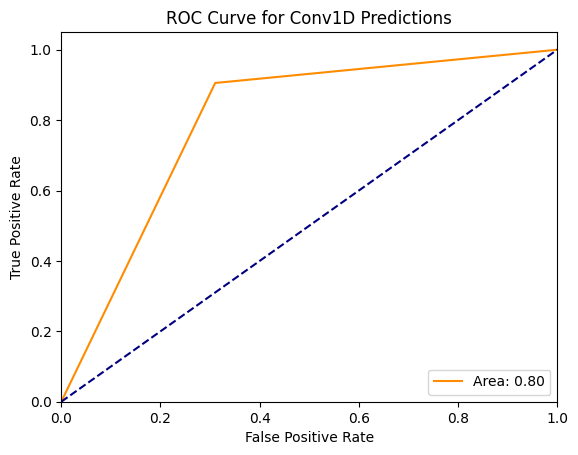

In [60]:
visualize_roc(y_test, conv1d_pred, "Conv1D")